In [2]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(-1, 28*28) / 255.
X_test = X_test.reshape(-1, 28*28) / 255.

In [4]:
autoencoder_model = Sequential([
    # encoder
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    
    # decoder
    Dense(128, activation='relu'),
    Dense(28*28, activation='sigmoid')
])
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_model.fit(X_train, X_train, epochs=5, batch_size=256, validation_data=(X_test, X_test), verbose=0)

reconstructed_images = autoencoder_model.predict(X_test, verbose=0)

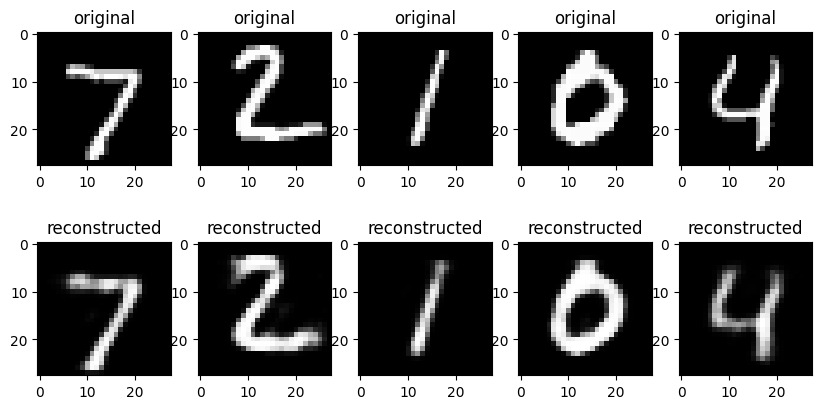

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(5):
    ax0 = axes[0, i]
    ax0.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax0.set_title('original')
    
    ax1 = axes[1, i]
    ax1.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax1.set_title('reconstructed')